# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Borrow-Feautures" data-toc-modified-id="Borrow-Feautures-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Borrow Feautures</a></div><div class="lev3 toc-item"><a href="#导入模块" data-toc-modified-id="导入模块-011"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>导入模块</a></div><div class="lev3 toc-item"><a href="#查看7个数据源-&amp;-构造特征" data-toc-modified-id="查看7个数据源-&amp;-构造特征-012"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>查看7个数据源 &amp; 构造特征</a></div><div class="lev4 toc-item"><a href="#bureau_balance-信用局贷款的月账单（信用局申请ID-x-月份）" data-toc-modified-id="bureau_balance-信用局贷款的月账单（信用局申请ID-x-月份）-0121"><span class="toc-item-num">0.1.2.1&nbsp;&nbsp;</span>bureau_balance 信用局贷款的月账单（信用局申请ID x 月份）</a></div><div class="lev4 toc-item"><a href="#bureau-信用局贷款-（当前申请ID-x-信用局申请ID）" data-toc-modified-id="bureau-信用局贷款-（当前申请ID-x-信用局申请ID）-0122"><span class="toc-item-num">0.1.2.2&nbsp;&nbsp;</span>bureau 信用局贷款 （当前申请ID x 信用局申请ID）</a></div><div class="lev4 toc-item"><a href="#previous_application-在HomeCredit的过往申请（当前申请ID-x-过往申请ID）" data-toc-modified-id="previous_application-在HomeCredit的过往申请（当前申请ID-x-过往申请ID）-0123"><span class="toc-item-num">0.1.2.3&nbsp;&nbsp;</span>previous_application 在HomeCredit的过往申请（当前申请ID x 过往申请ID）</a></div><div class="lev4 toc-item"><a href="#POS_CASH_balance-在HomeCredit过往申请的月账单（当前申请ID-x-过往申请ID-x-相对月份）" data-toc-modified-id="POS_CASH_balance-在HomeCredit过往申请的月账单（当前申请ID-x-过往申请ID-x-相对月份）-0124"><span class="toc-item-num">0.1.2.4&nbsp;&nbsp;</span>POS_CASH_balance 在HomeCredit过往申请的月账单（当前申请ID x 过往申请ID x 相对月份）</a></div><div class="lev4 toc-item"><a href="#credit_card_balance-在HomeCredit的信用卡的月账单（当前申请ID-x-过往申请ID-x-相对月份）" data-toc-modified-id="credit_card_balance-在HomeCredit的信用卡的月账单（当前申请ID-x-过往申请ID-x-相对月份）-0125"><span class="toc-item-num">0.1.2.5&nbsp;&nbsp;</span>credit_card_balance 在HomeCredit的信用卡的月账单（当前申请ID x 过往申请ID x 相对月份）</a></div><div class="lev4 toc-item"><a href="#installments_payments-在HomeCredit的还款记录（当前申请ID-x-过往申请ID）" data-toc-modified-id="installments_payments-在HomeCredit的还款记录（当前申请ID-x-过往申请ID）-0126"><span class="toc-item-num">0.1.2.6&nbsp;&nbsp;</span>installments_payments 在HomeCredit的还款记录（当前申请ID x 过往申请ID）</a></div><div class="lev4 toc-item"><a href="#application_train/application_test-在HomeCredit的申请记录（当前申请ID）" data-toc-modified-id="application_train/application_test-在HomeCredit的申请记录（当前申请ID）-0127"><span class="toc-item-num">0.1.2.7&nbsp;&nbsp;</span>application_train/application_test 在HomeCredit的申请记录（当前申请ID）</a></div><div class="lev3 toc-item"><a href="#生成宽表" data-toc-modified-id="生成宽表-013"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>生成宽表</a></div><div class="lev3 toc-item"><a href="#第一个线性模型" data-toc-modified-id="第一个线性模型-014"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>第一个线性模型</a></div><div class="lev3 toc-item"><a href="#筛选特征" data-toc-modified-id="筛选特征-015"><span class="toc-item-num">0.1.5&nbsp;&nbsp;</span>筛选特征</a></div><div class="lev3 toc-item"><a href="#验证版" data-toc-modified-id="验证版-016"><span class="toc-item-num">0.1.6&nbsp;&nbsp;</span>验证版</a></div><div class="lev3 toc-item"><a href="#提交版A" data-toc-modified-id="提交版A-017"><span class="toc-item-num">0.1.7&nbsp;&nbsp;</span>提交版A</a></div><div class="lev3 toc-item"><a href="#提交板B" data-toc-modified-id="提交板B-018"><span class="toc-item-num">0.1.8&nbsp;&nbsp;</span>提交板B</a></div><div class="lev3 toc-item"><a href="#提交版C" data-toc-modified-id="提交版C-019"><span class="toc-item-num">0.1.9&nbsp;&nbsp;</span>提交版C</a></div>

## Borrow Feautures

看看同样特征的情况下线性模型和梯度提升树的差距。

特征构造脚本的来源：https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm/code

### 导入模块

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
# from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import gc

### 查看7个数据源 & 构造特征

#### bureau_balance 信用局贷款的月账单（信用局申请ID x 月份）

In [3]:
buro_bal = pd.read_csv('./input/bureau_balance.csv', nrows=100)
buro_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [34]:
buro_bal = pd.read_csv('./input/bureau_balance.csv')

data_stack = {}

# total group
grp = buro_bal.groupby("SK_ID_BUREAU")
data_stack["cnt"] = grp.size()
data_stack["status_cnt"] = grp.STATUS.count()
data_stack["max_month"] = grp.MONTHS_BALANCE.max()
data_stack["min_month"] = grp.MONTHS_BALANCE.min()
data_stack["maxmin_month"] = data_stack["max_month"] - data_stack["min_month"]

# status group
for status_ in buro_bal.STATUS.unique():
    grp = buro_bal[buro_bal.STATUS == status_].groupby("SK_ID_BUREAU")
    data_stack["status_{}_cnt".format(status_)] = grp.size()
    data_stack["status_{}_max_month".format(status_)] = grp.MONTHS_BALANCE.max()
    data_stack["status_{}_min_month".format(status_)] = grp.MONTHS_BALANCE.min()
    data_stack["status_{}_maxmin_month".format(status_)] = data_stack["status_{}_max_month".format(status_)] - data_stack["status_{}_min_month".format(status_)]
    data_stack["status_{}_max_offset".format(status_)] = data_stack["max_month"] - data_stack["status_{}_max_month".format(status_)]
    data_stack["status_{}_min_offset".format(status_)] = data_stack["min_month"] - data_stack["status_{}_maxmin_month".format(status_)]
    data_stack["status_{}_raito".format(status_)] = data_stack["status_{}_cnt".format(status_)] / data_stack["cnt"]

buro_bal_wide = pd.DataFrame(data_stack)
print(buro_bal_wide.shape)
buro_bal_wide.to_csv("./data/buro_bal_wide_004.csv")

del buro_bal, grp
gc.collect()

(817395, 61)


352

In [36]:
del data_stack
gc.collect()

213

In [37]:
buro_bal_wide.head().T

SK_ID_BUREAU,5001709,5001710,5001711,5001712,5001713
cnt,97.000000,83.000000,4.00,19.000000,22.0
max_month,0.000000,0.000000,0.00,0.000000,0.0
maxmin_month,96.000000,82.000000,3.00,18.000000,21.0
min_month,-96.000000,-82.000000,-3.00,-18.000000,-21.0
status_0_cnt,NaN,5.000000,3.00,10.000000,NaN
status_0_max_month,NaN,-48.000000,-1.00,-9.000000,NaN
status_0_max_offset,NaN,48.000000,1.00,9.000000,NaN
status_0_maxmin_month,NaN,5.000000,2.00,9.000000,NaN
status_0_min_month,NaN,-53.000000,-3.00,-18.000000,NaN
status_0_min_offset,NaN,-87.000000,-5.00,-27.000000,NaN


#### bureau 信用局贷款 （当前申请ID x 信用局申请ID）

In [67]:
buro = pd.read_csv('./input/bureau.csv', nrows=100)
buro.head().T

,0,1,2,3,4
SK_ID_CURR,215354,215354,215354,215354,215354
SK_ID_BUREAU,5714462,5714463,5714464,5714465,5714466
CREDIT_ACTIVE,Closed,Active,Active,Active,Active
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-497,-208,-203,-203,-629
CREDIT_DAY_OVERDUE,0,0,0,0,0
DAYS_CREDIT_ENDDATE,-153,1075,528,NaN,1197
DAYS_ENDDATE_FACT,-153,NaN,NaN,NaN,NaN
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,77674.5
CNT_CREDIT_PROLONG,0,0,0,0,0


In [ ]:
buro["credit_type_merge"] = buro_full.CREDIT_TYPE
freq_types = {
    'Consumer credit',
    'Credit card',
    'Mortgage',
    'Car loan',
    'Microloan',
    'Loan for working capital replenishment',
    'Loan for business development'
}
buro.loc[~buro_full.CREDIT_TYPE.isin(freq_types), "credit_type_merge"] = "other type"

In [68]:
buro.CREDIT_TYPE.value_counts()

Consumer credit    70
Credit card        27
Car loan            2
Mortgage            1
Name: CREDIT_TYPE, dtype: int64

In [69]:
buro.CREDIT_ACTIVE.value_counts()

Closed    64
Active    36
Name: CREDIT_ACTIVE, dtype: int64

In [41]:
buro.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [2]:
buro = pd.read_csv('./input/bureau.csv')
data_stack = {}

# total group
grp = buro.groupby("SK_ID_CURR")
data_stack["buro_cnt"] = grp.size()
data_stack["buro_type_cnt"] = grp.CREDIT_TYPE.count()
data_stack["buro_currency_cnt"] = grp.CREDIT_CURRENCY.count()

# active group
for status_ in buro.CREDIT_ACTIVE.unique():
    grp = buro[buro.CREDIT_ACTIVE == status_].groupby("SK_ID_CURR")
    data_stack["buro_active_{}_cnt".format(status_)] = grp.size()
    data_stack["buro_active_{}_ratio".format(status_)] = data_stack["buro_active_{}_cnt".format(status_)] / data_stack["buro_cnt"]
    data_stack["buro_active_{}_type_cnt".format(status_)] = grp.CREDIT_TYPE.count()
    data_stack["buro_active_{}_currency_cnt".format(status_)] = grp.CREDIT_CURRENCY.count()

# type group
for status_ in buro.CREDIT_TYPE.unique():
    grp = buro[buro.CREDIT_TYPE == status_].groupby("SK_ID_CURR")
    data_stack["buro_type_{}_cnt".format(status_)] = grp.size()
    data_stack["buro_type_{}_ratio".format(status_)] = data_stack["buro_type_{}_cnt".format(status_)] / data_stack["buro_cnt"]
    data_stack["buro_type_{}_type_cnt".format(status_)] = grp.CREDIT_TYPE.count()
    data_stack["buro_type_{}_currency_cnt".format(status_)] = grp.CREDIT_CURRENCY.count()

buro_wide = pd.DataFrame(data_stack)
buro_wide.to_csv("./data/buro_wide_002.csv")

del buro_wide, data_stack, grp
gc.collect()

In [3]:
print(buro_wide.shape)
print(buro_wide.index.nunique())

(305811, 79)

In [44]:
buro_bal_wide.reset_index().head().SK_ID_BUREAU

0    5001709
1    5001710
2    5001711
3    5001712
4    5001713
Name: SK_ID_BUREAU, dtype: int64

In [46]:
# buro = pd.read_csv('./input/bureau.csv')
# buro_bal_wide = pd.read_csv("./data/buro_bal_wide_004.csv")
buro_full = buro.merge(right=buro_bal_wide.reset_index(), how="left", on="SK_ID_BUREAU")

buro_full_numcols = list(buro_full.dtypes[buro_full.dtypes != "object"].index)
buro_full_numcols.remove("SK_ID_CURR")
buro_full_numcols.remove("SK_ID_BUREAU")

grp = buro_full.groupby("SK_ID_CURR")[buro_full_numcols]
buro_full_avg = grp.mean()
buro_full_max = grp.max()
buro_full_min = grp.min()
buro_full_maxmin = buro_full_max - buro_full_min

buro_full_avg.columns = [col_ + "_avg" for col_ in buro_full_avg.columns]
buro_full_max.columns = [col_ + "_max" for col_ in buro_full_max.columns]
buro_full_min.columns = [col_ + "_min" for col_ in buro_full_min.columns]
buro_full_maxmin.columns = [col_ + "_maxmin" for col_ in buro_full_maxmin.columns]

buro_full_wide = pd.concat([buro_full_avg, buro_full_max, buro_full_min, buro_full_maxmin], axis=1)
buro_full_wide.to_csv("./data/buro_full_wide_004.csv")

del buro_full_avg, buro_full_max, buro_full_min, buro_full_maxmin, buro_full, grp
gc.collect()

580

In [47]:
buro_full_wide.shape

(305811, 292)

In [18]:
# buro_full_wide = pd.concat([buro_full_avg, buro_full_max, buro_full_min, buro_full_maxmin], axis=1)
# buro_full_wide.to_csv("./data/buro_full_wide_002.csv")

# del buro_full_avg, buro_full_max, buro_full_min, buro_full_maxmin, buro_full, grp
# gc.collect()

35

In [12]:
del buro_full_wide
gc.collect()

117

In [17]:
buro_full_max.shape

(305811, 72)

In [73]:
buro_full.CREDIT_TYPE.value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

In [71]:
buro_full[buro_full.cnt.notnull()].head().T

,768,769,770,771,772
SK_ID_CURR,380361,380361,380361,380361,380361
SK_ID_BUREAU,5715448,5715449,5715451,5715452,5715453
CREDIT_ACTIVE,Active,Active,Closed,Closed,Closed
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-820,-357,-917,-993,-1146
CREDIT_DAY_OVERDUE,0,0,0,0,0
DAYS_CREDIT_ENDDATE,31069,1119,-187,31039,681
DAYS_ENDDATE_FACT,NaN,NaN,-759,-831,-780
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,NaN
CNT_CREDIT_PROLONG,0,0,0,0,0


In [72]:
buro_full.CREDIT_CURRENCY.value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

#### previous_application 在HomeCredit的过往申请（当前申请ID x 过往申请ID）

In [12]:
prev = pd.read_csv('./input/previous_application.csv', nrows=100)
prev.head().T

,0,1,2,3,4
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265
SK_ID_CURR,271877,108129,122040,176158,202054
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.6,15060.7,47041.3,31924.4
AMT_APPLICATION,17145,607500,112500,450000,337500
AMT_CREDIT,17145,679671,136444,470790,404055
AMT_DOWN_PAYMENT,0,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,17145,607500,112500,450000,337500
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9


In [14]:
prev.NAME_CONTRACT_TYPE.value_counts()

Cash loans         51
Consumer loans     37
Revolving loans    12
Name: NAME_CONTRACT_TYPE, dtype: int64

In [106]:
prev = pd.read_csv('./input/previous_application.csv')

In [107]:
prev.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

#### POS_CASH_balance 在HomeCredit过往申请的月账单（当前申请ID x 过往申请ID x 相对月份）

In [16]:
pos = pd.read_csv('./input/POS_CASH_balance.csv', nrows=100)
pos.head().T

,0,1,2,3,4
SK_ID_PREV,1803195,1715348,1784872,1903291,2341044
SK_ID_CURR,182943,367990,397406,269225,334279
MONTHS_BALANCE,-31,-33,-32,-35,-35
CNT_INSTALMENT,48,36,12,48,36
CNT_INSTALMENT_FUTURE,45,35,9,42,35
NAME_CONTRACT_STATUS,Active,Active,Active,Active,Active
SK_DPD,0,0,0,0,0
SK_DPD_DEF,0,0,0,0,0


In [17]:
prev = pd.read_csv('./input/previous_application.csv')
pos = pd.read_csv('./input/POS_CASH_balance.csv')

In [8]:
prev.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [19]:
pos["contract_type"] = pos.SK_ID_PREV.map(prev.set_index("SK_ID_PREV").NAME_CONTRACT_TYPE)

In [20]:
pos.contract_type.value_counts()

Consumer loans    5997319
Cash loans        3663478
Name: contract_type, dtype: int64

In [12]:
print(pos.shape, pos.SK_ID_PREV.nunique())

(10001358, 9) 936325


In [16]:
data_stack = {}

# total group
grp = pos.groupby("SK_ID_CURR")
data_stack["apl_cnt"] = grp.SK_ID_PREV.count()
data_stack["type_cnt"] = grp.contract_type.count()
data_stack["max_month"] = grp.MONTHS_BALANCE.max()
data_stack["min_month"] = grp.MONTHS_BALANCE.min()
data_stack["maxmin_month"] = data_stack["max_month"] - data_stack["min_month"]

for active_ in pos.NAME_CONTRACT_STATUS.unique():
    grp = pos[pos.NAME_CONTRACT_STATUS == active_].groupby("SK_ID_CURR")
    data_stack["status_{}_apl_cnt".format(active_)] = grp.SK_ID_PREV.count()
    data_stack["status_{}_type_cnt".format(active_)] = grp.contract_type.count()
    data_stack["status_{}_max_month".format(active_)] = grp.MONTHS_BALANCE.max()
    data_stack["status_{}_min_month".format(active_)] = grp.MONTHS_BALANCE.min()
    data_stack["status_{}_maxmin_month".format(active_)] = data_stack["status_{}_max_month".format(active_)] - data_stack["status_{}_min_month".format(active_)]
    data_stack["status_{}_max_offset".format(active_)] = data_stack["max_month"] - data_stack["status_{}_max_month".format(active_)]
    data_stack["status_{}_min_offset".format(active_)] = data_stack["min_month"] - data_stack["status_{}_maxmin_month".format(active_)]
    data_stack["status_{}_raito".format(active_)] = data_stack["status_{}_apl_cnt".format(active_)] / data_stack["apl_cnt"]

# status group
for status_ in pos.contract_type.unique():
    grp = pos[pos.contract_type == status_].groupby("SK_ID_CURR")
    data_stack["type_{}_apl_cnt".format(status_)] = grp.SK_ID_PREV.count()
    data_stack["type_{}_max_month".format(status_)] = grp.MONTHS_BALANCE.max()
    data_stack["type_{}_min_month".format(status_)] = grp.MONTHS_BALANCE.min()
    data_stack["type_{}_maxmin_month".format(status_)] = data_stack["type_{}_max_month".format(status_)] - data_stack["type_{}_min_month".format(status_)]
    data_stack["type_{}_max_offset".format(status_)] = data_stack["max_month"] - data_stack["type_{}_max_month".format(status_)]
    data_stack["type_{}_min_offset".format(status_)] = data_stack["min_month"] - data_stack["type_{}_maxmin_month".format(status_)]
    data_stack["type_{}_raito".format(status_)] = data_stack["type_{}_apl_cnt".format(status_)] / data_stack["apl_cnt"]

pos_bal_wide = pd.DataFrame(data_stack)
pos_bal_wide.columns = ["pos_bal_" + col_ for col_ in pos_bal_wide.columns]
print(pos_bal_wide.shape)
pos_bal_wide.to_csv("./data/pos_bal_wide_004.csv")

del pos, grp
gc.collect()

(337252, 98)


214

#### credit_card_balance 在HomeCredit的信用卡的月账单（当前申请ID x 过往申请ID x 相对月份）

In [18]:
cc_bal = pd.read_csv('./input/credit_card_balance.csv', nrows=100)
cc_bal.head().T

,0,1,2,3,4
SK_ID_PREV,2562384,2582071,1740877,1389973,1891521
SK_ID_CURR,378907,363914,371185,337855,126868
MONTHS_BALANCE,-6,-1,-7,-4,-1
AMT_BALANCE,56.97,63975.6,31815.2,236572,453919
AMT_CREDIT_LIMIT_ACTUAL,135000,45000,450000,225000,450000
AMT_DRAWINGS_ATM_CURRENT,0,2250,0,2250,0
AMT_DRAWINGS_CURRENT,877.5,2250,0,2250,11547
AMT_DRAWINGS_OTHER_CURRENT,0,0,0,0,0
AMT_DRAWINGS_POS_CURRENT,877.5,0,0,0,11547
AMT_INST_MIN_REGULARITY,1700.33,2250,2250,11795.8,22924.9


In [19]:
cc_bal.NAME_CONTRACT_STATUS.value_counts()

Active       90
Completed    10
Name: NAME_CONTRACT_STATUS, dtype: int64

In [21]:
cc_bal = pd.read_csv('./input/credit_card_balance.csv')
cc_bal["contract_type"] = cc_bal.SK_ID_PREV.map(prev.set_index("SK_ID_PREV").NAME_CONTRACT_TYPE)

In [24]:
cc_bal.NAME_CONTRACT_STATUS.value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [28]:
data_stack = {}

# total group
grp = cc_bal.groupby("SK_ID_CURR")
data_stack["apl_cnt"] = grp.SK_ID_PREV.count()
data_stack["statue_cnt"] = grp.NAME_CONTRACT_STATUS.count()
data_stack["max_month"] = grp.MONTHS_BALANCE.max()
data_stack["min_month"] = grp.MONTHS_BALANCE.min()
data_stack["maxmin_month"] = data_stack["max_month"] - data_stack["min_month"]

for active_ in pos.NAME_CONTRACT_STATUS.unique():
    grp = cc_bal[cc_bal.NAME_CONTRACT_STATUS == active_].groupby("SK_ID_CURR")
    data_stack["status_{}_apl_cnt".format(active_)] = grp.SK_ID_PREV.count()
    data_stack["status_{}_max_month".format(active_)] = grp.MONTHS_BALANCE.max()
    data_stack["status_{}_min_month".format(active_)] = grp.MONTHS_BALANCE.min()
    data_stack["status_{}_maxmin_month".format(active_)] = data_stack["status_{}_max_month".format(active_)] - data_stack["status_{}_min_month".format(active_)]
    data_stack["status_{}_max_offset".format(active_)] = data_stack["max_month"] - data_stack["status_{}_max_month".format(active_)]
    data_stack["status_{}_min_offset".format(active_)] = data_stack["min_month"] - data_stack["status_{}_maxmin_month".format(active_)]
    data_stack["status_{}_raito".format(active_)] = data_stack["status_{}_apl_cnt".format(active_)] / data_stack["apl_cnt"]
    
cc_bal_wide = pd.DataFrame(data_stack)
cc_bal_wide.columns = ["cc_bal_" + col_ for col_ in cc_bal_wide.columns]
print(cc_bal_wide.shape)
cc_bal_wide.to_csv("./data/cc_bal_wide_004.csv")

del cc_bal_wide, data_stack, grp
gc.collect()

(103558, 68)


#### installments_payments 在HomeCredit的还款记录（当前申请ID x 过往申请ID）

In [24]:
inst = pd.read_csv('./input/installments_payments.csv', nrows=100)
inst.head().T

,0,1,2,3,4
SK_ID_PREV,1054186.00,1330831.000,2085231.0,2452527.00,2714724.000
SK_ID_CURR,161674.00,151639.000,193053.0,199697.00,167756.000
NUM_INSTALMENT_VERSION,1.00,0.000,2.0,1.00,1.000
NUM_INSTALMENT_NUMBER,6.00,34.000,1.0,3.00,2.000
DAYS_INSTALMENT,-1180.00,-2156.000,-63.0,-2418.00,-1383.000
DAYS_ENTRY_PAYMENT,-1187.00,-2156.000,-63.0,-2426.00,-1366.000
AMT_INSTALMENT,6948.36,1716.525,25425.0,24350.13,2165.040
AMT_PAYMENT,6948.36,1716.525,25425.0,24350.13,2160.585


#### application_train/application_test 在HomeCredit的申请记录（当前申请ID）

In [29]:
data = pd.read_csv('./input/application_train.csv', nrows=1000)
data.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500,270000,67500,135000,121500
AMT_CREDIT,406598,1.2935e+06,135000,312682,513000
AMT_ANNUITY,24700.5,35698.5,6750,29686.5,21865.5


In [31]:
data.FLAG_DOCUMENT_3.value_counts()

1    723
0    277
Name: FLAG_DOCUMENT_3, dtype: int64

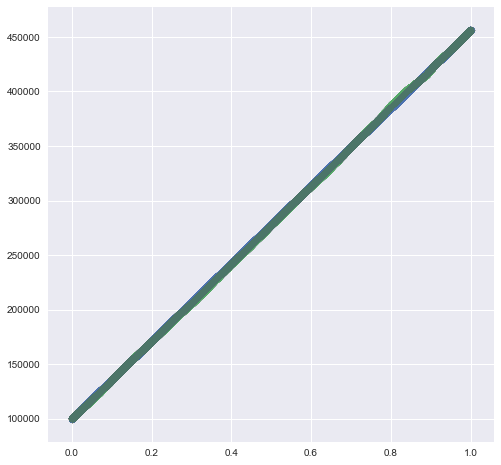

5244

In [40]:
data = pd.read_csv('./input/application_train.csv')
test = pd.read_csv('./input/application_test.csv')

y1 = data.sort_values("SK_ID_CURR").SK_ID_CURR.values
x1 = np.arange(len(y1)) / float(len(y1))

y2 = test.sort_values("SK_ID_CURR").SK_ID_CURR.values
x2 = np.arange(len(y2)) / float(len(y2))

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, alpha=.02)
plt.scatter(x2, y2, alpha=.02)
plt.show()

del data, test
gc.collect()

### 生成宽表

In [109]:
'''
def build_model_input():
    buro_bal = pd.read_csv('./input/bureau_balance.csv')
    print('Buro bal shape : ', buro_bal.shape)
    
    # print('transform to dummies')
    # buro_bal = pd.concat([buro_bal, pd.get_dummies(buro_bal.STATUS, prefix='buro_bal_status')], axis=1).drop('STATUS', axis=1)
    
    print('Counting buros')
    buro_counts = buro_bal[['SK_ID_BUREAU', 'MONTHS_BALANCE']].groupby('SK_ID_BUREAU').count()
    buro_bal['buro_count'] = buro_bal['SK_ID_BUREAU'].map(buro_counts['MONTHS_BALANCE'])
    
    print('averaging buro bal')
    avg_buro_bal = buro_bal.groupby('SK_ID_BUREAU').mean()
    avg_buro_bal.columns = ['avg_buro_' + f_ for f_ in avg_buro_bal.columns]
    # maxmin_buro_bal = buro_bal.groupby("SK_ID_BUREAU").max() - buro_bal.groupby("SK_ID_BUREAU").min()
    # maxmin_buro_bal.columns = ['maxmin_buro_'+ f_ for f_ in maxmin_buro_bal.columns]
    del buro_bal
    gc.collect()
    
    print('Read Bureau')
    buro = pd.read_csv('./input/bureau.csv')
    buro.columns = ['buro_' + f_ for f_ in buro_full.columns]
    
    # print('Go to dummies')
    # buro_credit_active_dum = pd.get_dummies(buro.CREDIT_ACTIVE, prefix='ca_')
    # buro_credit_currency_dum = pd.get_dummies(buro.CREDIT_CURRENCY, prefix='cu_')
    # buro_credit_type_dum = pd.get_dummies(buro.CREDIT_TYPE, prefix='ty_')
    
    # buro_full = pd.concat([buro, buro_credit_active_dum, buro_credit_currency_dum, buro_credit_type_dum], axis=1)
    # buro.columns = ['buro_' + f_ for f_ in buro_full.columns]
    
    # del buro_credit_active_dum, buro_credit_currency_dum, buro_credit_type_dum
    # gc.collect()
    
    print('Merge with buro avg')
    buro_full = buro.merge(right=avg_buro_bal.reset_index(), how='left', on='SK_ID_BUREAU', suffixes=('', '_bur_bal'))
    # buro_full = buro_full.merge(right=maxmin_buro_bal.reset_index(), how='left', on='SK_ID_BUREAU', suffixes=('', '_bur_bal_maxmin'))
    
    print('Counting buro per SK_ID_CURR')
    nb_bureau_per_curr = buro_full[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby('SK_ID_CURR').count()
    buro_full['SK_ID_BUREAU'] = buro_full['SK_ID_CURR'].map(nb_bureau_per_curr['SK_ID_BUREAU'])
    
    print('Averaging bureau')
    avg_buro = buro_full.groupby('SK_ID_CURR').mean()
    print(avg_buro.head())
    
    del buro, buro_full
    gc.collect()
    
    print('Read prev')
    prev = pd.read_csv('./input/previous_application.csv')
    
    #  prev_cat_features = [
    #     f_ for f_ in prev.columns if prev[f_].dtype == 'object'
    # ]
    
    # print('Go to dummies')
    # prev_dum = pd.DataFrame()
    # for f_ in prev_cat_features:
    #     prev_dum = pd.concat([prev_dum, pd.get_dummies(prev[f_], prefix=f_).astype(np.uint8)], axis=1)
    
    # prev = pd.concat([prev, prev_dum], axis=1)
    
    del prev_dum
    gc.collect()
    
    print('Counting number of Prevs')
    nb_prev_per_curr = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    prev['SK_ID_PREV'] = prev['SK_ID_CURR'].map(nb_prev_per_curr['SK_ID_PREV'])
    
    print('Averaging prev')
    avg_prev = prev.groupby('SK_ID_CURR').mean()
    print(avg_prev.head())
    del prev
    gc.collect()
    
    print('Reading POS_CASH')
    pos = pd.read_csv('./input/POS_CASH_balance.csv')
    
    # print('Go to dummies')
    # pos = pd.concat([pos, pd.get_dummies(pos['NAME_CONTRACT_STATUS'])], axis=1)
    
    print('Compute nb of prevs per curr')
    nb_prevs = pos[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    pos['SK_ID_PREV'] = pos['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
    
    print('Go to averages')
    avg_pos = pos.groupby('SK_ID_CURR').mean()
    
    del pos, nb_prevs
    gc.collect()
    
    print('Reading CC balance')
    cc_bal = pd.read_csv('./input/credit_card_balance.csv')
    
    print('Go to dummies')
    cc_bal = pd.concat([cc_bal, pd.get_dummies(cc_bal['NAME_CONTRACT_STATUS'], prefix='cc_bal_status_')], axis=1)
    
    nb_prevs = cc_bal[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    cc_bal['SK_ID_PREV'] = cc_bal['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
    
    print('Compute average')
    avg_cc_bal = cc_bal.groupby('SK_ID_CURR').mean()
    avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
    
    del cc_bal, nb_prevs
    gc.collect()
    
    print('Reading Installments')
    inst = pd.read_csv('./input/installments_payments.csv')
    nb_prevs = inst[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    inst['SK_ID_PREV'] = inst['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
    
    avg_inst = inst.groupby('SK_ID_CURR').mean()
    avg_inst.columns = ['inst_' + f_ for f_ in avg_inst.columns]
    
    print('Read data and test')
    data = pd.read_csv('./input/application_train.csv')
    test = pd.read_csv('./input/application_test.csv')
    print('Shapes : ', data.shape, test.shape)
    
    y = data[["SK_ID_CURR", 'TARGET']]
    del data['TARGET']
    
    # categorical_feats = [
    #     f for f in data.columns if data[f].dtype == 'object'
    #  ]
    # categorical_feats
    # for f_ in categorical_feats:
    #     data[f_], indexer = pd.factorize(data[f_])
    #     test[f_] = indexer.get_indexer(test[f_])
        
    data = data.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_pos.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_pos.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
    
    del avg_buro, avg_prev
    gc.collect()

    return data, test, y
'''

'\ndef build_model_input():\n    buro_bal = pd.read_csv(\'./input/bureau_balance.csv\')\n    print(\'Buro bal shape : \', buro_bal.shape)\n    \n    # print(\'transform to dummies\')\n    # buro_bal = pd.concat([buro_bal, pd.get_dummies(buro_bal.STATUS, prefix=\'buro_bal_status\')], axis=1).drop(\'STATUS\', axis=1)\n    \n    print(\'Counting buros\')\n    buro_counts = buro_bal[[\'SK_ID_BUREAU\', \'MONTHS_BALANCE\']].groupby(\'SK_ID_BUREAU\').count()\n    buro_bal[\'buro_count\'] = buro_bal[\'SK_ID_BUREAU\'].map(buro_counts[\'MONTHS_BALANCE\'])\n    \n    print(\'averaging buro bal\')\n    avg_buro_bal = buro_bal.groupby(\'SK_ID_BUREAU\').mean()\n    avg_buro_bal.columns = [\'avg_buro_\' + f_ for f_ in avg_buro_bal.columns]\n    # maxmin_buro_bal = buro_bal.groupby("SK_ID_BUREAU").max() - buro_bal.groupby("SK_ID_BUREAU").min()\n    # maxmin_buro_bal.columns = [\'maxmin_buro_\'+ f_ for f_ in maxmin_buro_bal.columns]\n    del buro_bal\n    gc.collect()\n    \n    print(\'Read Bureau\')\

In [110]:
'''
data ,test, y = build_model_input()
'''

'\ndata ,test, y = build_model_input()\n'

In [108]:
'''
data.to_csv("./input/data_002.csv", index=False)
test.to_csv("./input/test_002.csv", index=False)
y.to_csv("./input/y_002.csv", index=False)
'''

'\ndata.to_csv("./input/data_002.csv", index=False)\ntest.to_csv("./input/test_002.csv", index=False)\ny.to_csv("./input/y_002.csv", index=False)\n'

In [ ]:
data = pd.read_csv("./input/data_001.csv")
test = pd.read_csv("./input/test_001.csv")
y = pd.read_csv("./input/y_001.csv")

data = data.merge(right=buro_full_wide.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=buro_full_wide.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=buro_wide.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=buro_wide.reset_index(), how='left', on='SK_ID_CURR')

### 第一个线性模型

In [24]:
data_train = data[data.SK_ID_CURR < 130000]
data_val = data[(data.SK_ID_CURR >= 130000) & (data.SK_ID_CURR < 150000)]

ydata_train = y[y.SK_ID_CURR < 130000]
ydata_val = y[(y.SK_ID_CURR >= 130000) & (y.SK_ID_CURR < 150000)]

In [25]:
features = list(data.columns)
features.remove("SK_ID_CURR")

In [26]:
X_num_train = data_train[features].values
X_num_val = data_val[features].values

y_train = ydata_train.TARGET.values
y_val = ydata_val.TARGET.values

In [27]:
X_num_train.shape, X_num_val.shape

((25803, 379), (17392, 379))

In [28]:
import preprocessing7 as preprocessing
import score_card4 as score_card
import score_card_fs

In [29]:
cutter = preprocessing.MPChi2Cutter(init_bin_num=25, max_bin_num=5, max_peak_num=1)
X_cut_train = cutter.fit_transform(X_num_train, y_train)
X_cut_val = cutter.transform(X_num_val)

encoder = preprocessing.MPWOEEncoder(alpha=10)
X_woe_train = encoder.fit_transform(X_cut_train, y_train)
X_woe_val = encoder.transform(X_cut_val)

In [33]:
X_woe_val[np.isnan(X_woe_val)] = 0

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

def ks_score(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_score = auc(fpr, tpr)
    w = tpr - fpr
    return w.max(), thresholds[np.nanargmax(w)]

clf = LogisticRegression(**{"penalty": "l1", "C": 1.0})
clf.fit(X_woe_train, y_train)

pred_train = clf.predict_proba(X_woe_train)[:,1]
auc_train = roc_auc_score(y_train, pred_train)

pred_val = clf.predict_proba(X_woe_val)[:,1]
auc_val = roc_auc_score(y_val, pred_val)

print("*" * 20 + " MODEL REPORT " + "*" * 20)
print("X-shape-train: {}, X-shape-val: {}".format(X_woe_train.shape, X_woe_val.shape))
print("auc-train: {:.2}, auc-val: {:.2}".format(auc_train, auc_val))
# print("ks-train: {:.2}, ks-val: {:.2}".format(ks_train, ks_val))
# print("maxks-train: {:.2}, maxks-val: {:.2}".format(th_train, th_val))

******************** MODEL REPORT ********************
X-shape-train: (25803, 379), X-shape-val: (17392, 379)
auc-train: 0.79, auc-val: 0.75


### 筛选特征

In [38]:
fs_stack = score_card_fs.FSStack(features)
fs_result = score_card_fs.filter_lasso_sc(X_woe_train, y_train, argv={"penalty": "l1", "C": 1.0})
fs_stack.append("filter0_lasso_sc", fs_result)
fs_result

FSResult(origin_cnt=379, selected_cnt=72, selected=[  0   2   4   7   8  11  12  14  15  16  17  18  19  22  24  26  27  29
  30  31  32  38  39  40  41  46  49  50  59  72  74  90  92  93 103 106
 120 121 125 129 131 132 133 151 157 158 163 164 165 170 174 175 179 224
 226 233 271 286 308 319 329 331 332 333 334 346 347 351 355 358 362 378], score=[ 0.66807795  0.          0.12957549  0.          0.12122191  0.          0.
  0.51280338  0.36775074  0.          0.          0.57261936  0.10131459
  0.          0.32771403  0.03865694  0.39407421  0.22464932  0.15084032
  0.48511367  0.          0.          0.22839672  0.          0.48954639
  0.          0.29163264  0.29626128  0.          0.17253409  0.52132601
  0.27519361  0.34612473  0.          0.          0.          0.          0.
  0.32948191  0.51633718  0.67186011  0.66527513  0.          0.          0.
  0.          0.06474182  0.          0.          0.05878546  0.016305    0.
  0.          0.          0.          0.         

In [39]:
def create_clf():
    return LogisticRegression(**{"penalty": "l1", "C": 1.0})

fs_result = score_card_fs.wrapper_backward_forward_mt(X_woe_train[:, fs_stack.get_latest_ids()], X_woe_val[:, fs_stack.get_latest_ids()], y_train, y_val, create_clf)
fs_stack.append("wrapper0_stepwise", fs_result)

metric stop inproving.


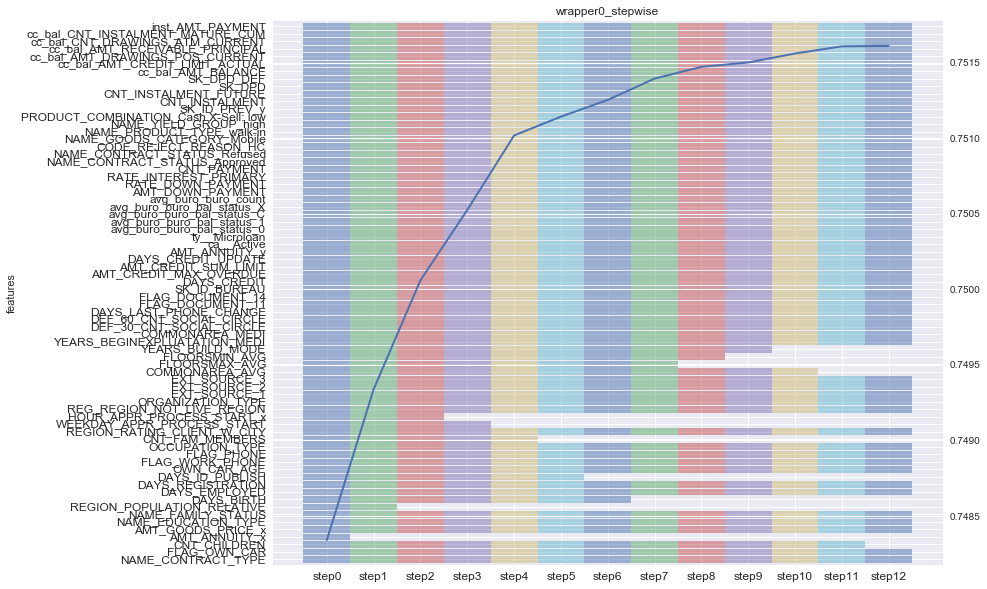

In [40]:
fs_result = fs_stack.get_fsresult(1)
score_card_fs.plot_wrapper_result(fs_result, features=fs_stack.get_selected_names(0), argv={"figsize": (12, 10)})
plt.title(fs_stack.get_fsname(1))
plt.show()

### 验证版

In [42]:
final_features = fs_stack.get_latest_names()
final_ids = fs_stack.get_latest_ids()
# final_features.remove('a_work_distance')
X_woe_train_v = X_woe_train[:, final_ids]
X_woe_val_v = X_woe_val[:, final_ids]

y_train_v = y_train
y_val_v = y_val

# LR
clf = LogisticRegression(**{"penalty": "l1", "C": 1.0})
clf.fit(X_woe_train_v, y_train_v)

pred_train_v = clf.predict_proba(X_woe_train_v)[:,1]
pred_val_v = clf.predict_proba(X_woe_val_v)[:,1]

auc_train_v = roc_auc_score(y_train_v, pred_train_v)
auc_val_v = roc_auc_score(y_val_v, pred_val_v)

ks_train_v, th_train_v = ks_score(y_train_v, pred_train_v)
ks_val_v, th_val_v = ks_score(y_val_v, pred_val_v)

print("*" * 20 + " MODEL REPORT " + "*" * 20)
print("X-shape-train: {}, X-shape-val: {}".format(X_woe_train_v.shape, X_woe_val_v.shape))
print("auc-train: {:.2}, auc-val: {:.2}".format(auc_train_v, auc_val_v))
print("ks-train: {:.2}, ks-val: {:.2}".format(ks_train_v, ks_val_v))
print("maxks-train: {:.2}, maxks-val: {:.2}".format(th_train_v, th_val_v))

print("*" * 20 + " LASSO COEF " + "*" * 20)
for feat_, coef_ in zip(final_features, clf.coef_[0]):
    print("{:>30} : {:.3}".format(feat_, coef_))

******************** MODEL REPORT ********************
X-shape-train: (25803, 60), X-shape-val: (17392, 60)
auc-train: 0.77, auc-val: 0.75
ks-train: 0.41, ks-val: 0.38
maxks-train: 0.086, maxks-val: 0.083
******************** LASSO COEF ********************
            NAME_CONTRACT_TYPE : 0.809
                  FLAG_OWN_CAR : 0.0946
             AMT_GOODS_PRICE_x : 0.478
           NAME_EDUCATION_TYPE : 0.572
            NAME_FAMILY_STATUS : 0.0382
                 DAYS_EMPLOYED : 0.406
             DAYS_REGISTRATION : 0.284
                   OWN_CAR_AGE : 0.518
               FLAG_WORK_PHONE : 0.182
                    FLAG_PHONE : 0.536
               OCCUPATION_TYPE : 0.337
   REGION_RATING_CLIENT_W_CITY : 0.345
    REG_REGION_NOT_LIVE_REGION : 0.243
             ORGANIZATION_TYPE : 0.37
                  EXT_SOURCE_1 : 0.527
                  EXT_SOURCE_2 : 0.697
                  EXT_SOURCE_3 : 0.665
  YEARS_BEGINEXPLUATATION_MEDI : 0.275
               COMMONAREA_MEDI : 0.28
 

In [43]:
fs_stack.get_latest_names()

array(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'AMT_GOODS_PRICE_x',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_MEDI',
       'COMMONAREA_MEDI', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_14', 'SK_ID_BUREAU',
       'DAYS_CREDIT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY_y', 'ca__Active',
       'ty__Microloan', 'avg_buro_buro_bal_status_0',
       'avg_buro_buro_bal_status_1', 'avg_buro_buro_bal_status_C',
       'avg_buro_buro_bal_status_X', 'avg_buro_buro_count',
       'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'CNT_PAYMENT', '

### 提交版A

In [50]:
fs_stack.get_latest_names()

array(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'AMT_GOODS_PRICE_x',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_MEDI',
       'COMMONAREA_MEDI', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_14', 'SK_ID_BUREAU',
       'DAYS_CREDIT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY_y', 'ca__Active',
       'ty__Microloan', 'avg_buro_buro_bal_status_0',
       'avg_buro_buro_bal_status_1', 'avg_buro_buro_bal_status_C',
       'avg_buro_buro_bal_status_X', 'avg_buro_buro_count',
       'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'CNT_PAYMENT', '

In [52]:
X_num_sub = test[features].values
X_cut_sub = cutter.transform(X_num_sub)
X_woe_sub = encoder.transform(X_cut_sub)
X_woe_sub[np.isnan(X_woe_sub)] = 0

pred_sub = clf.predict_proba(X_woe_sub[:, fs_stack.get_latest_ids()])[:,1]
test["TARGET"] = pred_sub
# test[["SK_ID_CURR", "TARGET"]].to_csv("./result/submission-001-A.csv", index=False)

### 提交板B

In [54]:
X_num_all = data[fs_stack.get_latest_names()].values
X_num_sub = test[fs_stack.get_latest_names()].values
y_all = y.TARGET.values

cutter_b = preprocessing.MPChi2Cutter(init_bin_num=25, max_bin_num=5, max_peak_num=1)
X_cut_all = cutter_b.fit_transform(X_num_all, y_all)
X_cut_sub = cutter_b.transform(X_num_sub)

encoder_b = preprocessing.MPWOEEncoder(alpha=10)
X_woe_all = encoder_b.fit_transform(X_cut_all, y_all)
X_woe_sub = encoder_b.transform(X_cut_sub)
X_woe_sub[np.isnan(X_woe_sub)] = 0

clf_b = LogisticRegression(**{"penalty": "l1", "C": 1.0})
clf_b.fit(X_woe_all, y_all)

pred_all = clf_b.predict_proba(X_woe_all)[:,1]
pred_sub = clf_b.predict_proba(X_woe_sub)[:,1]

test["TARGET"] = pred_sub
test[["SK_ID_CURR", "TARGET"]].to_csv("./result/submission-001-B.csv", index=False)

### 提交版C

借一个xgb提交 ： https://www.kaggle.com/kailex/tidy-xgb-0-778/code

In [57]:
xgb_sub = pd.read_csv("./result/tidy_xgb_0.7784.csv")

xgb_sub["TARGET"] = xgb_sub.TARGET.values * .9 + pred_sub * .1
xgb_sub.to_csv("./result/submission-001-C.csv", index=False)

In [58]:
xgb_sub.head()

,SK_ID_CURR,TARGET
0,100001,0.030949
1,100005,0.071503
2,100013,0.015909
3,100028,0.039717
4,100038,0.119561
